**INST126 Final Project** <br>
<br>
**Group Member Names:** Catherine Onumajuru, Jessica Tang, James Gallier, Aparna Ranganathan   <br>
**Date:** 12/13/18 <br>

In [2]:
#import matplotlib for data visualization purposes
import matplotlib as plt
%pylab inline
#import pandas and numpy for data processing
import pandas as pd
import numpy as np

#### Sort Temperature Data ####

# Import Temp Data
temp_dataset = pd.read_csv("data01.csv")
dt02 = pd.read_csv("data02.csv")
dt03 = pd.read_csv("data03.csv")
dt04 = pd.read_csv("data04.csv")
dt05 = pd.read_csv("data05.csv")
dt06 = pd.read_csv("data06.csv")
dt07 = pd.read_csv("data07.csv")
dt08 = pd.read_csv("data08.csv")

# Consolidate Temperature data to a single dataframe
temp_dataset = temp_dataset.append([dt02, dt03, dt04, dt05, dt06, dt07, dt08])

# Drop Month, and non-essential year columns from dataset
temp_dataset = temp_dataset.drop(["Month"], axis=1)
temp_dataset = temp_dataset[temp_dataset.Year > 1979]
temp_dataset = temp_dataset[temp_dataset.Year < 2015]

# Group data by Country and Year, average Temp values & reset index
temp_dataset = temp_dataset.groupby(["Country", "Year"]).mean().reset_index()
# Organize dataset to have Country Codes on y-axis, Year on the x-axis, temp data populating data field
temp_dataset = pd.pivot(values=temp_dataset["tas"], index=temp_dataset["Country"], columns=temp_dataset["Year"])


Populating the interactive namespace from numpy and matplotlib


C:\Users\cathe\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(<matplotlib.legend.Legend at 0x24ee6aa8390>,
 Text(0.5,0,'Year'),
 Text(0,0.5,'Average Temperature (Celsius)'),
 Text(0.5,1,'Average Temperatures of Countries (1980-2014)'))

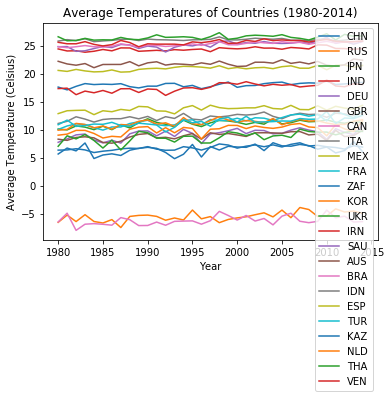

In [13]:
# These functions create the temperature graph
def country_plot(country):
    data = temp_dataset.loc[country] # selects the country from the dataset
    plt.plot(data.index, data.values) # plots the index and value for the country.

# This function uses the country_plot function to plot a list of countries into a graph
def plot_list(countries):
    for country in countries: # for every country in countries list
        country_plot(country) # 
    
    return plt.legend(countries), plt.xlabel('Year'), plt.ylabel('Average Temperature (Celsius)'), plt.title('Average Temperatures of Countries (1980-2014)')

# This creates a graph for the temperatures of the selected countries using the plot_list function
plot_list(['CHN', 'RUS', 'JPN', 'IND', 'DEU', 'GBR', 'CAN', 'ITA', 'MEX', 'FRA', 'ZAF', 'KOR', 'UKR', 'IRN', 'SAU', 'AUS', 
          'BRA', 'IDN', 'ESP', 'TUR', 'KAZ', 'NLD', 'THA', 'VEN'])
  

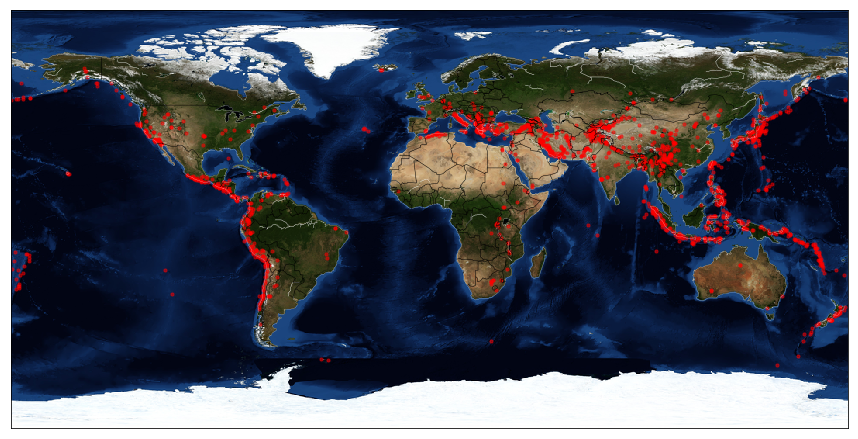

In [7]:
'''In this section, we have imported earthquake occurrence data in different locations.
We then created a scatter plot in order to show these occurrences, which will appear on top of a world map.'''

pd.options.display.max_rows = 999
from mpl_toolkits.basemap import Basemap # import Basemap for geoplotting of data on a map

# function to declutter the dataframe, where only the columns you want to look at, are shown.
def declutter(df, list_db): # input parameters are dataframe, and list of co
    decluttered_data = df[list_db] # makes a new dataframe with the list of columns that are selected
    return decluttered_data # returns decluttered dataframe

eq = pd.read_table('results.txt') # reads tabular file into a dataframe
selections = ['I_D', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'INTENSITY', 'COUNTRY', 'LATITUDE', 'LONGITUDE'] # selected the columns from the dataset that we want to look at
eq_occurrence = declutter(eq, selections)

lat = eq_occurrence['LATITUDE'] # assigns latitiude values to variable
lon= eq_occurrence['LONGITUDE'] # assigns longitude values to variable

fig = plt.figure(figsize=(15, 13), edgecolor='w') # sets the size for the map figure
# sets basemap configurations to be a cylindrical projection, sets resolution to crude, and sets the range for the lower left and upper right hand
# corner to be from -90 - -180 and 90 - 180
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )


m.bluemarble(scale=0.2)   # makes map to be blue marble
m.drawcoastlines(color='white', linewidth=0.2)  # adds coastlines
m.drawcountries() # draws country boundaries
x, y = m(lon, lat)  # transforms coordinates
plt.scatter(x, y, 10, marker='o', color='Red', alpha = 0.5) # scatters the lat and lon plots onto basemap
plt.show()

Text(0,0.5,'Frequency')

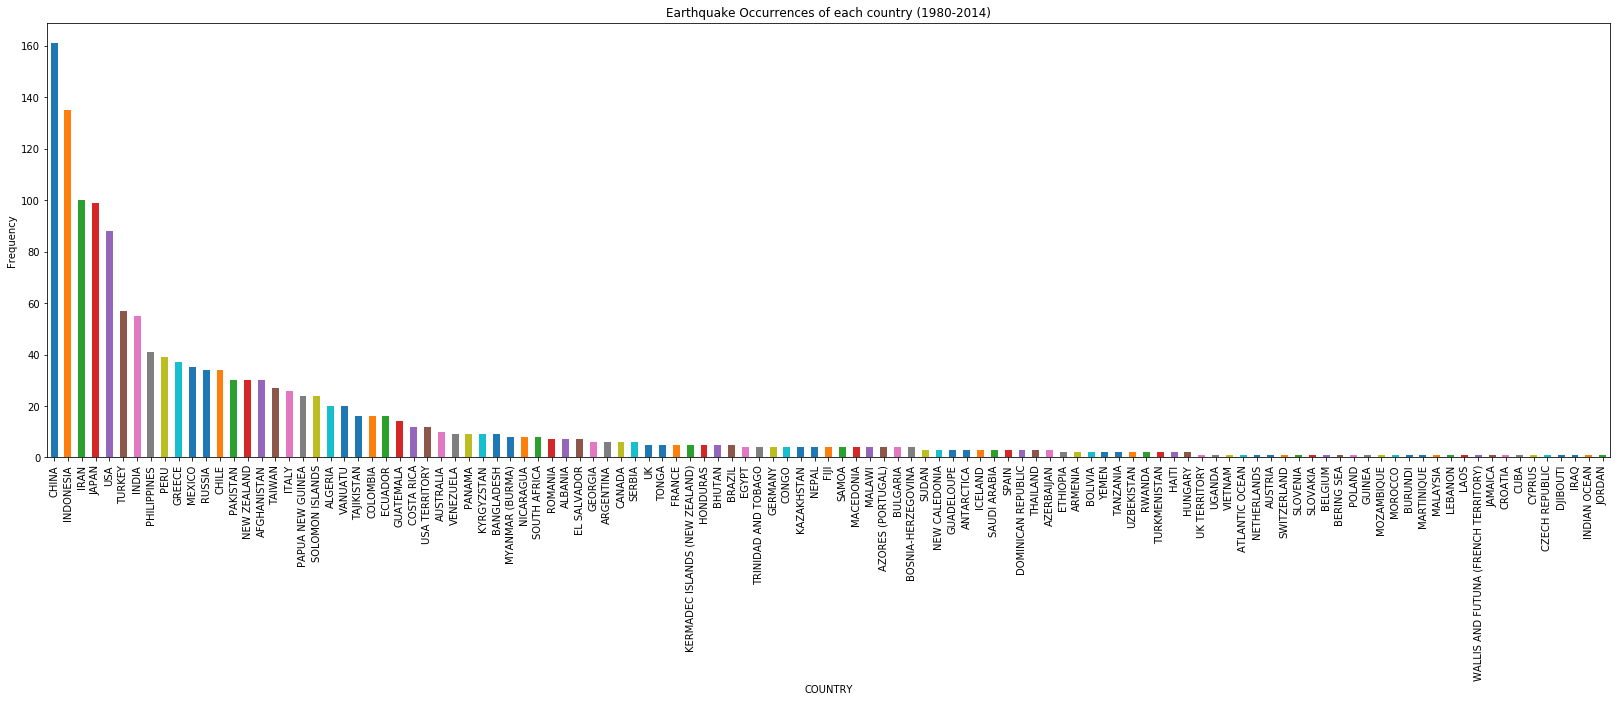

In [9]:
#### World Map Bar Graph ####
groupedtemp = eq_occurrence.groupby('COUNTRY').COUNTRY.count() # groups earthquake data frame by country column and counts how many times each country is repeated
                                                 # (this is to symbolize the occurrence of earthquakes in the world. (eg. from the table, China, Indonesia,
                                                 # and Iran have the most earthquakes))
grouped = groupedtemp.sort_values(ascending=False)
bar = grouped.plot(kind='bar',figsize=(28,8),title="Earthquake Occurrences of each country (1980-2014)") # bar graph of grouped table
bar.set_ylabel("Frequency")

Text(0,0.5,'CO2 Emissions (kt)')

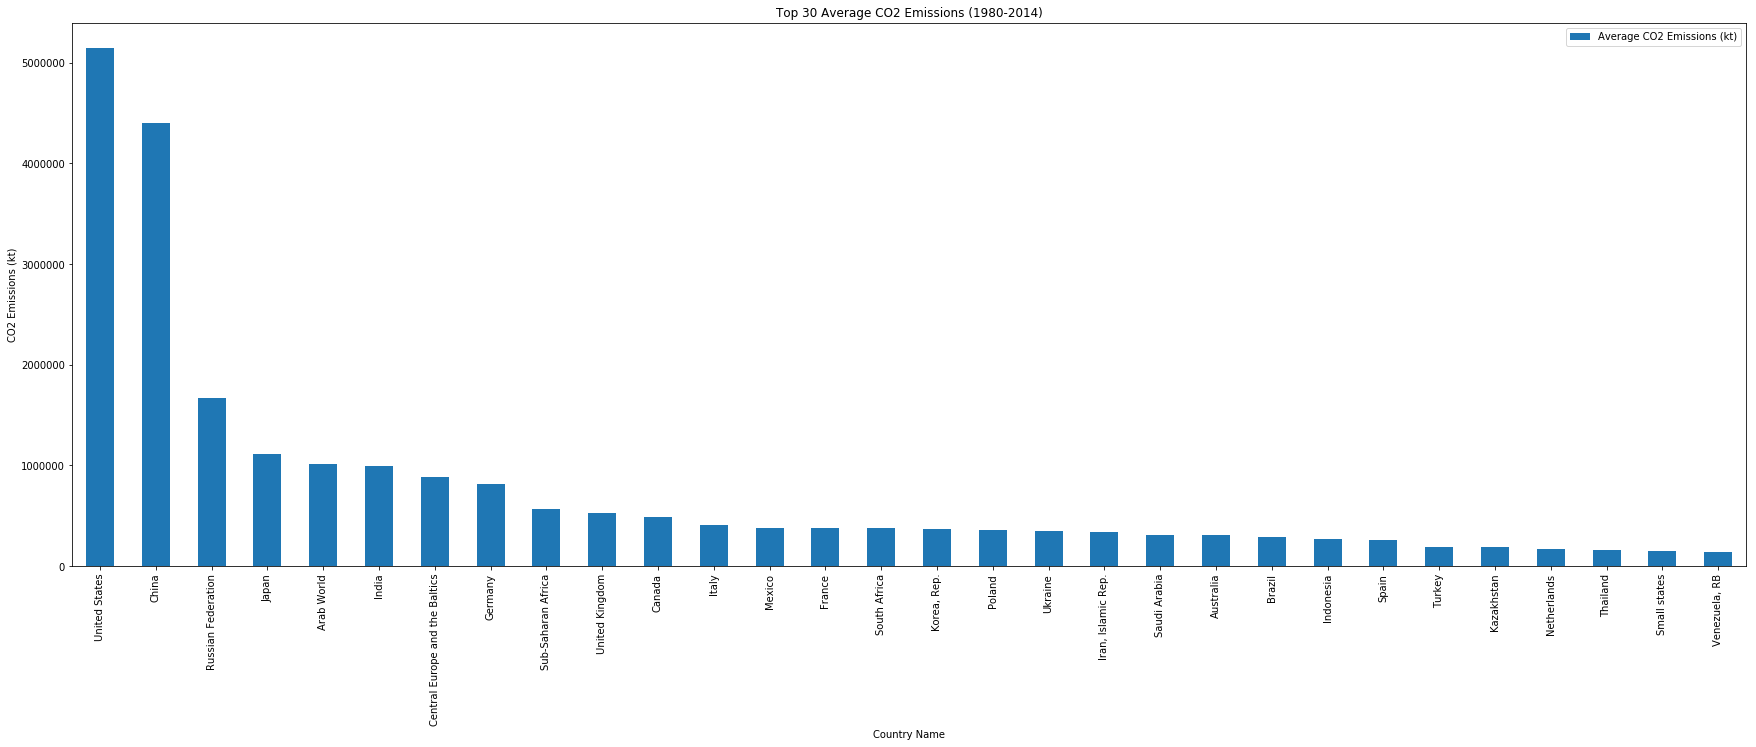

In [10]:
'''In this section, we have imported CO2 emissions data in different locations.
We then utilized data from select years in order to find the mean CO2 emission for each country in a new column.
We can then use this information to see which country had the highest mean CO2 emissions.
This information can be linked back to earthquake occurrences in order to see if emissions has an effect on this.'''
    
pd.options.display.float_format = '{:.2f}'.format # fixes an issue with pandas displaying the data in scientfic notation
co2 = pd.read_csv('co2 emissions.csv') # read csv file and assign it to variable
co2_df = co2.drop(columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971','1972',
                      '1973', '1974', '1975', '1976', '1977', '1978', '1979']) # drop years we don't need, since we are only looking at 1980-2014
co2_df['Average CO2 Emissions (kt)'] = co2_df.mean(axis = 1) # finds the mean co2 emission of each country and puts this in a new column at the end
co2_df

# The following code just simplifies the previous table into showing only average co2 emissions and country. With this we can see which countries had 
                                                          #the most CO2 emissions and make some conclusions on climate change and global warming/pollution
selected = ['Country Name', 'Average CO2 Emissions (kt)'] # selects the columns that we want to look at from the database.
avg_co2 = co2_df[selected].sort_values('Average CO2 Emissions (kt)', ascending=False)
avg_co2

## The following code sorts the average CO2 emissions table so that we can cleanly graph the top 30 countries
## drops unnecessary/unrelated rows and countries who have no average data
temp = avg_co2.drop([257,93,101,179,100,138,154,196,247,140,61,63,168,59,228,60,71,229,62,66,137,
                    151,132,234,202,238,126,159,236,239,213,102,103,72,189,105,134,133,96,9,
                    36,91,106,108,145,147,162,190,210,254,259])
# displays the top 30 countries based on average CO2 emissions
top_30_co2 = temp.head(30)
top_30_co2

# graphs the top 30 countries based on average CO2 emissions
bar2 = top_30_co2.plot(kind='bar', x = 'Country Name', figsize=(30,10),title="Top 30 Average CO2 Emissions (1980-2014)")
bar2.set_ylabel("CO2 Emissions (kt)")